In [48]:
# Import necessary libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Collection/Loading and Processing**

In [50]:
titanic_data = pd.read_csv('train.csv')

In [51]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
titanic_data.shape

(891, 12)

In [53]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
#ermove missing/null values
titanic_data = titanic_data.drop(['Cabin'], axis=1)

In [56]:
#replace misising values with mean number
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace =True)

In [57]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [58]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [59]:
# lets fix embarked
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [60]:
print(titanic_data['Embarked'].mode()[0])

S


In [61]:
# replace the mode value with missing value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [62]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Analysing the Data

In [63]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
# how many people survived?
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [65]:
#visualizing data
sns.set()

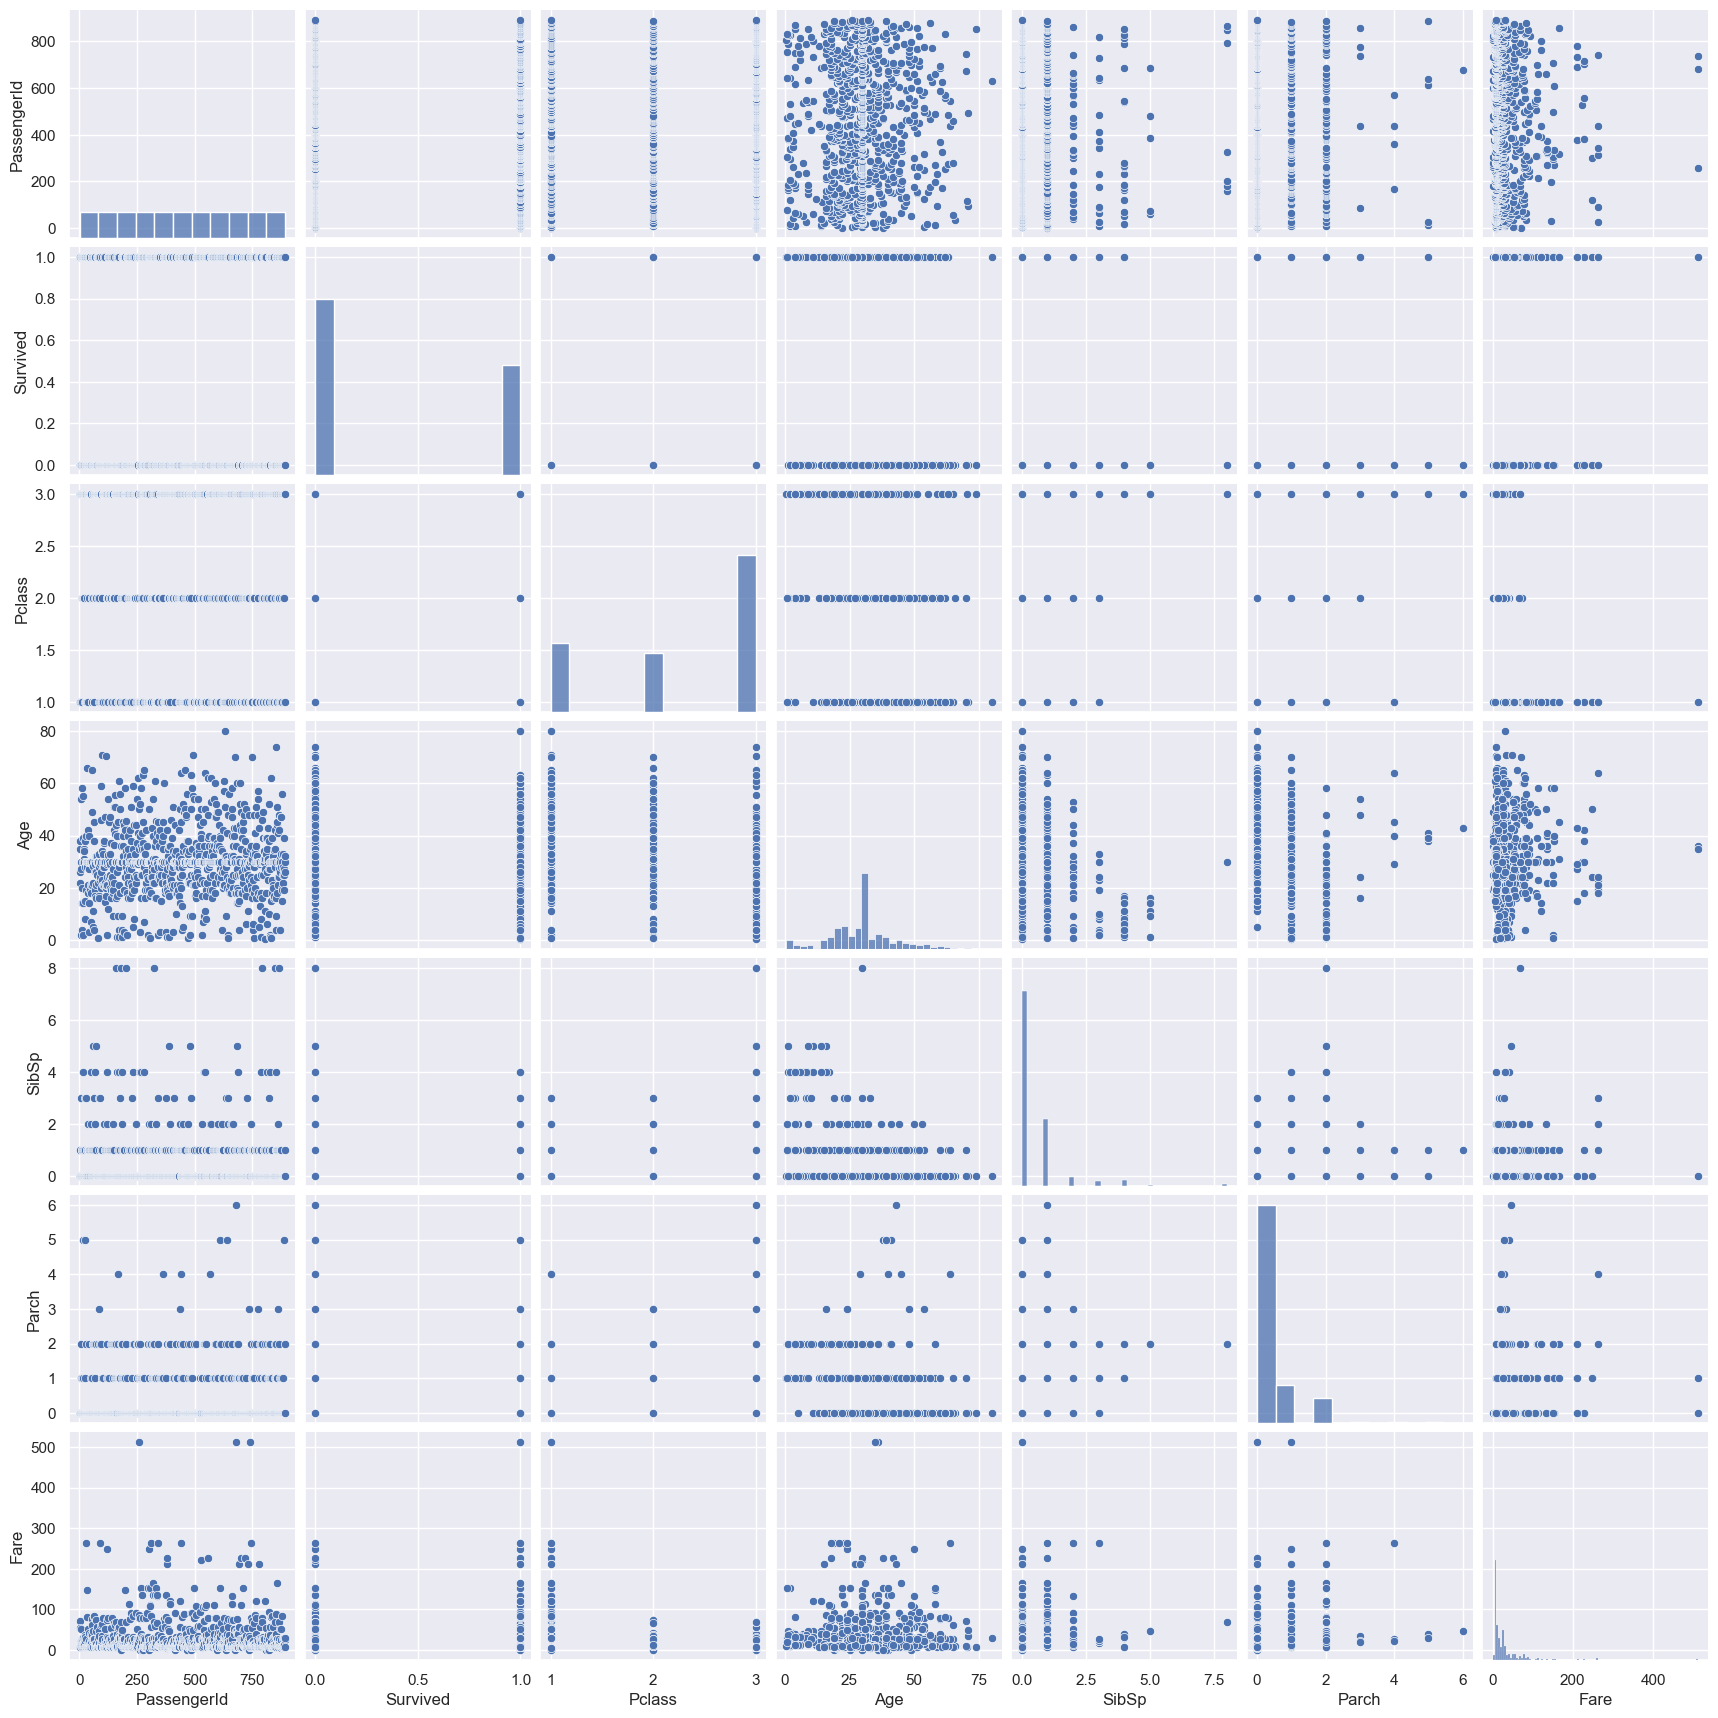

In [66]:
sns.pairplot(titanic_data)

In [67]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [68]:
#count plot for sex column
# sns.countplot(titanic_data['Sex'])

<Axes: xlabel='Sex', ylabel='count'>

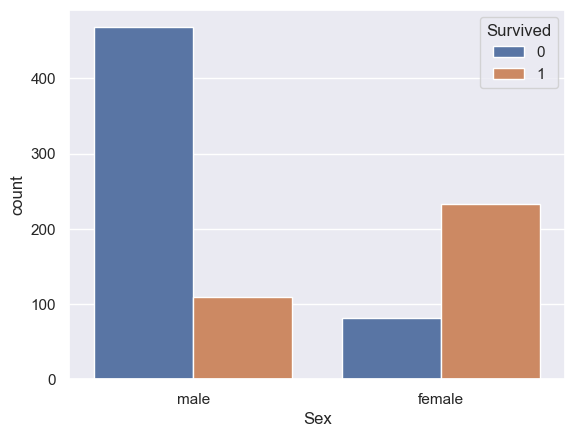

In [69]:
#Analyzing Gender wose survivors
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

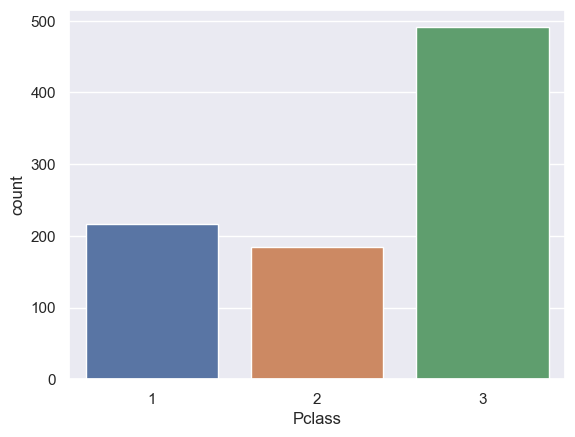

In [70]:
#count plot for Pclass column
sns.countplot (x = 'Pclass', data =titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

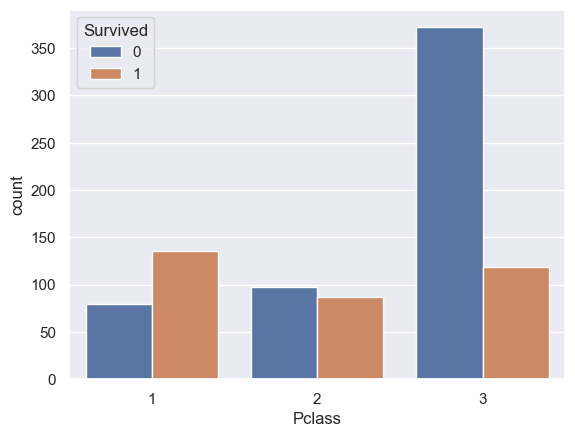

In [71]:
sns.countplot(x = 'Pclass', hue = 'Survived', data=titanic_data)

Encode categorical colulmns/data

In [72]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [73]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [74]:
titanic_data=titanic_data.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}})

In [75]:
x = titanic_data.drop(columns = ['PassengerId','Name', 'Ticket', 'Survived'], axis=1)


In [76]:
y = titanic_data['Survived']

In [77]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [78]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Split the data into test data and train data

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

In [80]:
x.shape, x_train.shape, x_test.shape

((891, 7), (712, 7), (179, 7))

In [81]:
y.shape, y_train.shape, y_test.shape

((891,), (712,), (179,))

Logistical Regression and model training

In [82]:
model = LogisticRegression()

In [83]:
#use the train data on logisticRegression model

In [84]:
model.fit(x_train, y_train)

C:\Users\Meet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluating and testing the model

In [85]:
x_trai_prediction = model.predict(x_train)

In [86]:
print(x_trai_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [87]:
training_data_accuracy = accuracy_score(y_train, x_trai_prediction)

In [88]:
print("Accuracy of training data is : ",training_data_accuracy)

Accuracy of training data is :  0.8075842696629213


In [89]:
#check accuracy of the test data
x_test_prediction = model.predict(x_test)

In [90]:
print(x_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [91]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [92]:
print("Accuracy score of test data is :\n ",test_data_accuracy)

Accuracy score of test data is :
  0.7821229050279329


In [93]:
#end the project

In [94]:
import joblib

In [95]:
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [96]:
!pip install pyngrok

In [98]:
import subprocess
import os
from pyngrok import ngrok

#setup ngrok with authentication

ngrok.set_auth_token("2cwrbRuHDTdPqcY6ECI1wUc2nF7_56tFuhfnjs9e4TzseiSpu")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

#retrive ngrok's public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL : ", public_url)

t=2024-02-27T18:18:32+0530 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=d28f08d69796 err="authentication failed: Your account is limited to 1 simultaneous ngrok agent session.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\n\nActive ngrok agent sessions in region 'us':\n  - ts_2cwxW1CVXLaxGIOVrNmLQA2zbJs (34.173.162.3)\r\n\r\nERR_NGROK_108\r\n"
t=2024-02-27T18:18:32+0530 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent session.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\n\nActive ngrok agent sessions in region 'us':\n  - ts_2cwxW1CVXLaxGIOVrNmLQA2zbJs (34.173.162.3)\r\n\r\nERR_NGROK_108\r\n"
t=2024-02-27T18:18:32+0530 lvl=e

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent session.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\n\nActive ngrok agent sessions in region 'us':\n  - ts_2cwxW1CVXLaxGIOVrNmLQA2zbJs (34.173.162.3)\r\n\r\nERR_NGROK_108\r\n.

In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

#Load the trained model
model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
  #HTML form to take inputs
  html_form = """
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>
    <style>
        body {
            background-color: black;
            color: white;
            font-family: Arial, sans-serif;
            text-align: center;
            padding: 20px;
        }
        #predictionForm {
            display: inline-block;
            text-align: left;
        }
        img {
            max-width: 100%;
            height: auto;
        }
    </style>
</head>
<body>
    <h2>Titanic Survival Prediction</h2>
    <form id="predictionForm" method="post" action="/predict">
        <label for="pclass">Pclass:</label>
        <input type="text" id="pclass" name="pclass"><br><br>

        <label for="sex">Sex (0 for male, 1 for female):</label>
        <input type="text" id="sex" name="sex"><br><br>

        <label for="age">Age:</label>
        <input type="text" id="age" name="age"><br><br>

        <label for="sibsp">SibSp:</label>
        <input type="text" id="sibsp" name="sibsp"><br><br>

        <label for="parch">Parch:</label>
        <input type="text" id="parch" name="parch"><br><br>

        <label for="fare">Fare:</label>
        <input type="text" id="fare" name="fare"><br><br>
 <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>
    <style>
        body {
            background-color: black;
            color: white;
            font-family: Arial, sans-serif;
            text-align: center;
            padding: 20px;
        }
        #predictionForm {
            display: inline-block;
            text-align: left;
        }
        img {
            max-width: 100%;
            height: auto;
        }
    </style>
</head>
<body>
    <h2>Titanic Survival Prediction</h2>
    <form id="predictionForm" method="post" action="/predict">
        <label for="pclass">Pclass:</label>
        <input type="text" id="pclass" name="pclass"><br><br>

        <label for="sex">Sex (0 for male, 1 for female):</label>
        <input type="text" id="sex" name="sex"><br><br>

        <label for="age">Age:</label>
        <input type="text" id="age" name="age"><br><br>

        <label for="sibsp">SibSp:</label>
        <input type="text" id="sibsp" name="sibsp"><br><br>
        <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
        <input type="text" id="embarked" name="embarked"><br><br>

        <button type="button" onclick="predictSurvival()">Predict</button>
    </form>

    <p id="predictionResult"></p>

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" alt="Titanic Image">

    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>

    """
  return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()
